In [3]:
from google.colab import drive
drive.mount('/content/drive')

# Navigate to your project folder in Drive
project_path = '/content/drive/MyDrive/ames-housing-ml'
%cd $project_path

Mounted at /content/drive
/content/drive/MyDrive/ames-housing-ml


In [4]:
!pip install pandas numpy scikit-learn seaborn matplotlib lightgbm xgboost catboost shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.3 MB/s eta 0:00:00


In [5]:
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/ames-housing-ml/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/ames-housing-ml/data/test.csv')

print(train.shape, test.shape)
train.head()

(1460, 81) (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [33]:
print(train.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<Axes: xlabel='SalePrice', ylabel='Count'>

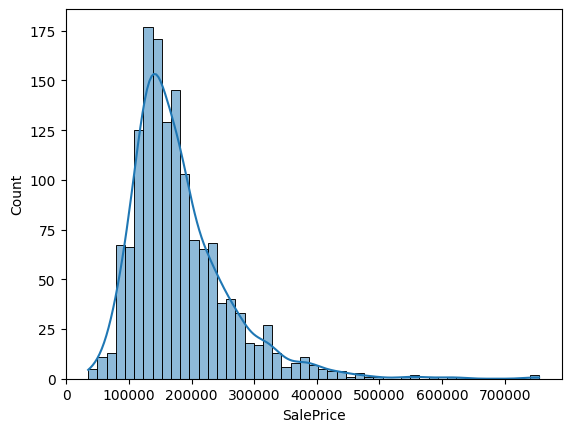

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(train['SalePrice'], kde=True)

<Axes: xlabel='SalePrice', ylabel='Count'>

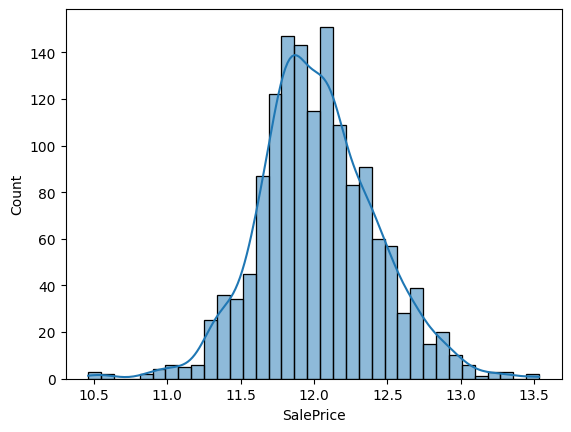

In [7]:
import numpy as np
sns.histplot(np.log1p(train['SalePrice']), kde=True)

In [8]:
train.isnull().sum().sort_values(ascending=False).head(20)

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageQual,81
GarageFinish,81
GarageType,81


<Axes: >

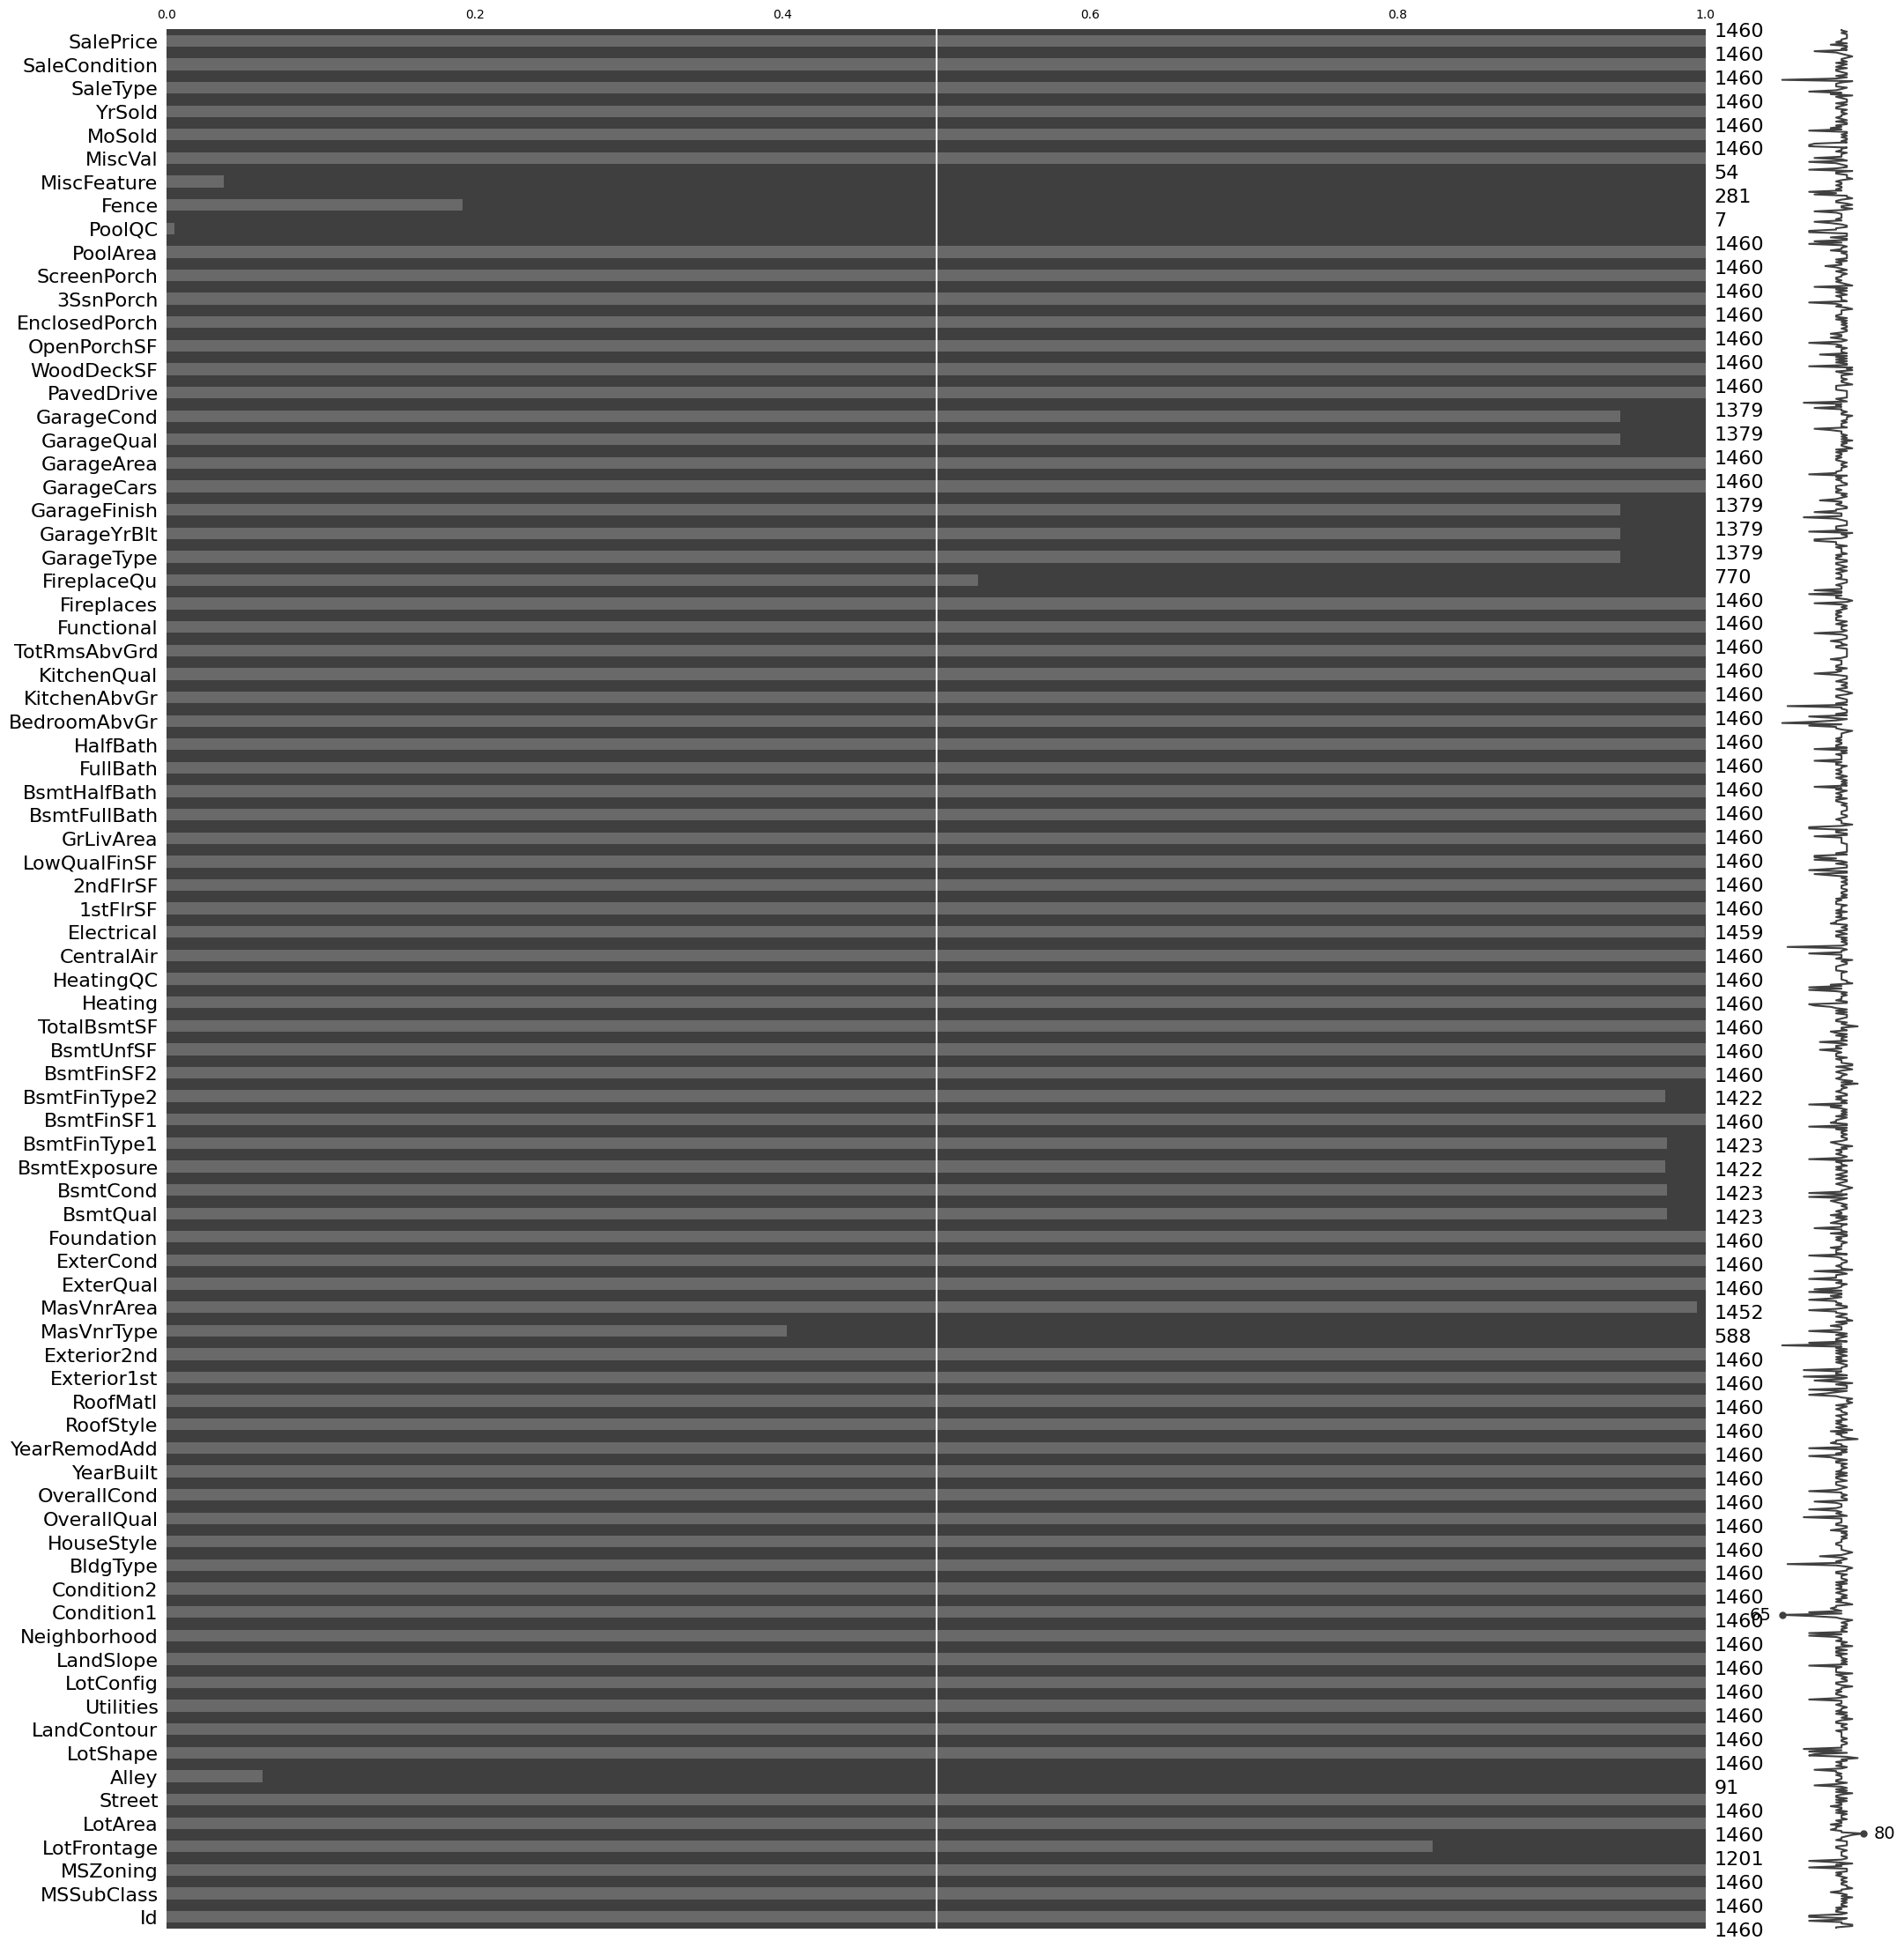

In [9]:
import missingno as msno
msno.matrix(train)
msno.bar(train)

In [10]:
num_features = train.select_dtypes(include=['int64','float64']).columns
cat_features = train.select_dtypes(include=['object']).columns
print("Numerical Features", num_features, "\nCategorical Features", cat_features)

Numerical Features Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object') 
Categorical Features Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinTy

In [27]:
for col in cat_features:
    print(col, train[col].nunique())

MSZoning 5
Street 2
Alley 2
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 3
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 4
BsmtCond 4
BsmtExposure 4
BsmtFinType1 6
BsmtFinType2 6
Heating 6
HeatingQC 5
CentralAir 2
Electrical 5
KitchenQual 4
Functional 7
FireplaceQu 5
GarageType 6
GarageFinish 3
GarageQual 5
GarageCond 5
PavedDrive 3
PoolQC 3
Fence 4
MiscFeature 4
SaleType 9
SaleCondition 6


<Axes: >

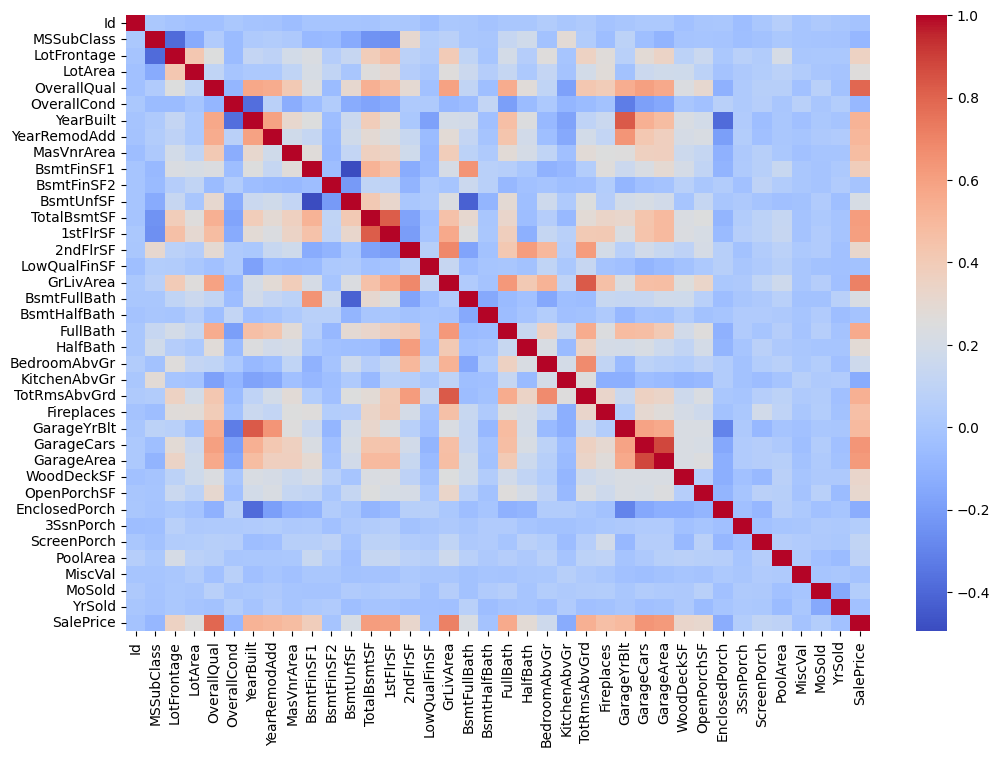

In [11]:
corr = train.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm")

In [12]:
corr_target = train.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)
print(corr_target.head(10))

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


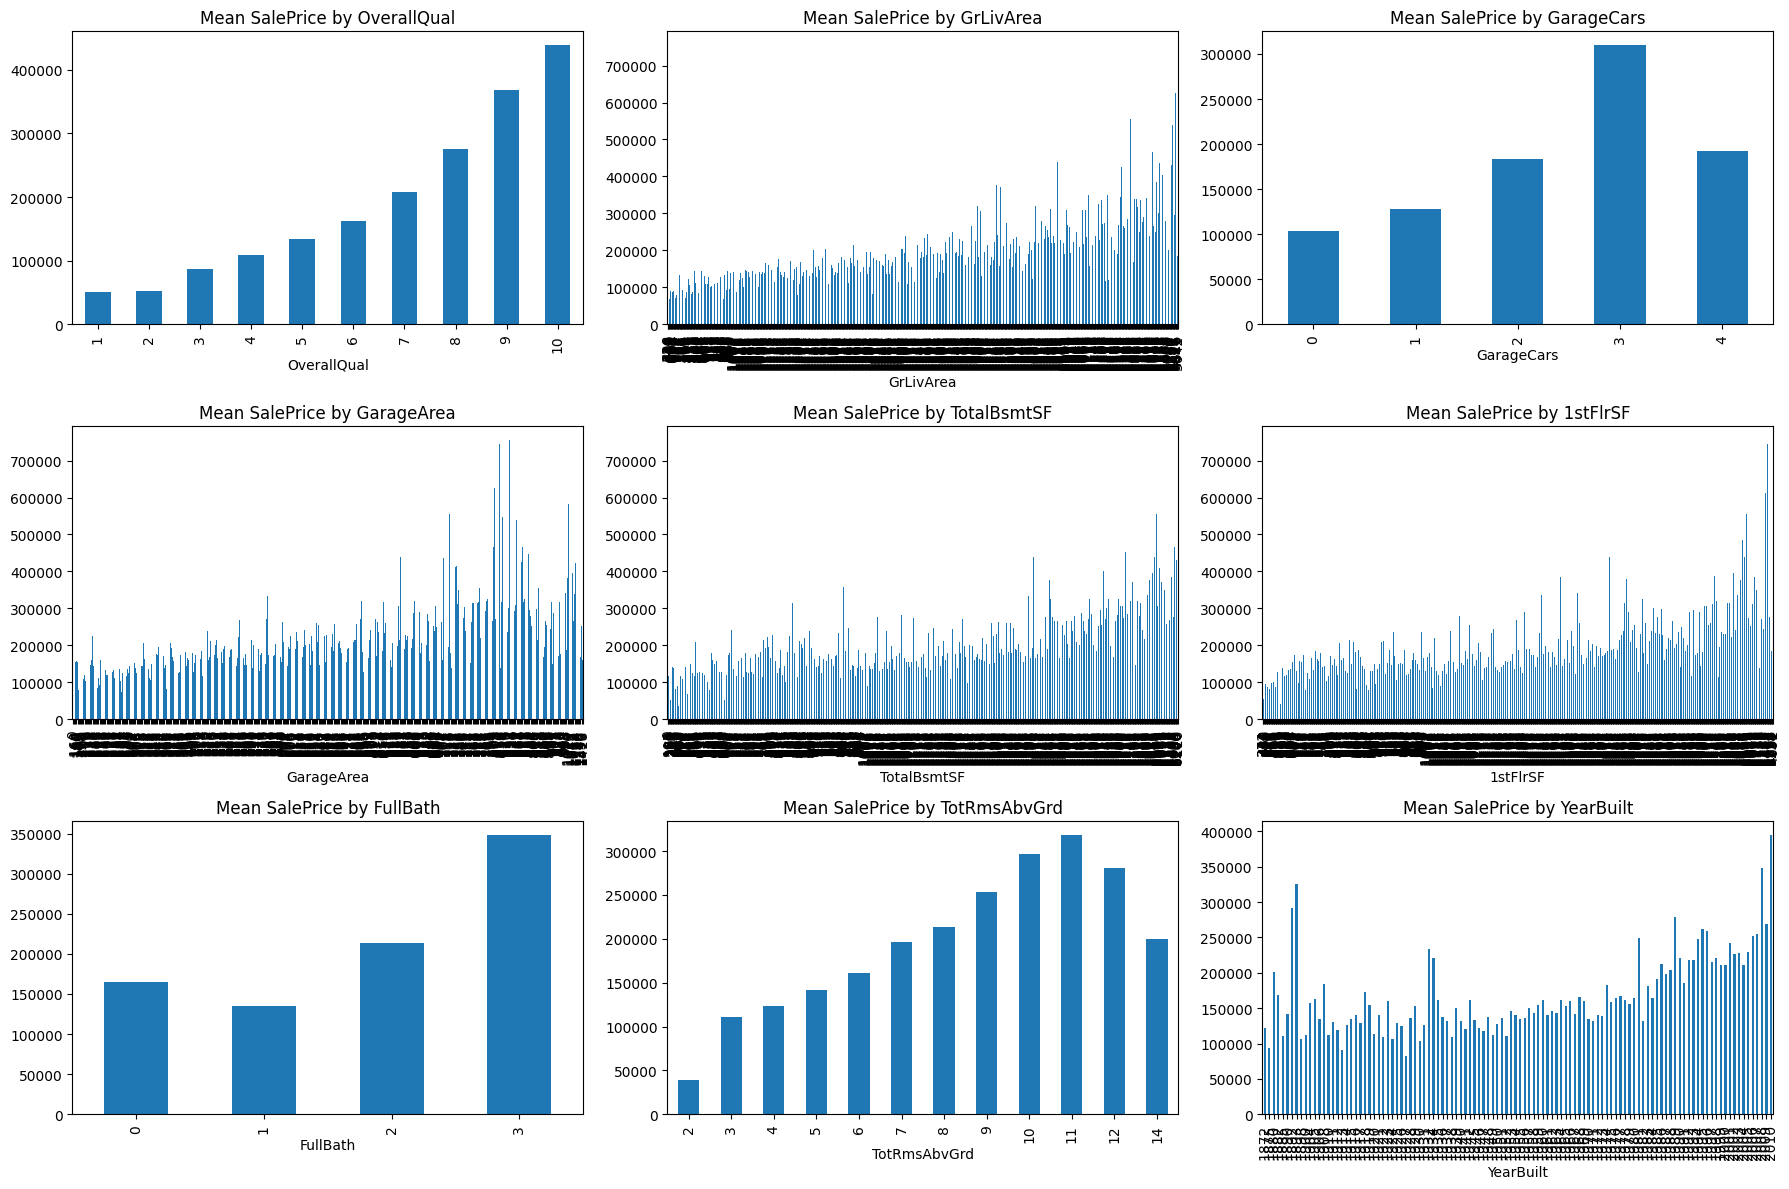

In [17]:
# train.groupby('OverallQual')['SalePrice'].mean().plot(kind='bar')
# plt.figure()
# train.groupby('GrLivArea')['SalePrice'].mean().plot(kind='bar')
# plt.figure()
# train.groupby('GarageCars')['SalePrice'].mean().plot(kind='bar')
# plt.figure()
# train.groupby('GarageArea')['SalePrice'].mean().plot(kind='bar')
# plt.figure()
# train.groupby('TotalBsmtSF')['SalePrice'].mean().plot(kind='bar')
# plt.figure()
# train.groupby('1stFlrSF')['SalePrice'].mean().plot(kind='bar')
# plt.figure()
# train.groupby('FullBath')['SalePrice'].mean().plot(kind='bar')
# plt.figure()
# train.groupby('TotRmsAbvGrd')['SalePrice'].mean().plot(kind='bar')
# plt.figure()
# train.groupby('YearBuilt')['SalePrice'].mean().plot(kind='bar')
# plt.figure()
# plt.show()

fig, axes = plt.subplots(3, 3, figsize=(18, 12))  # 3 rows x 3 columns
axes = axes.flatten()

features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
            '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']

for i, feature in enumerate(features):
    train.groupby(feature)['SalePrice'].mean().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Mean SalePrice by {feature}')

plt.tight_layout()
plt.show()

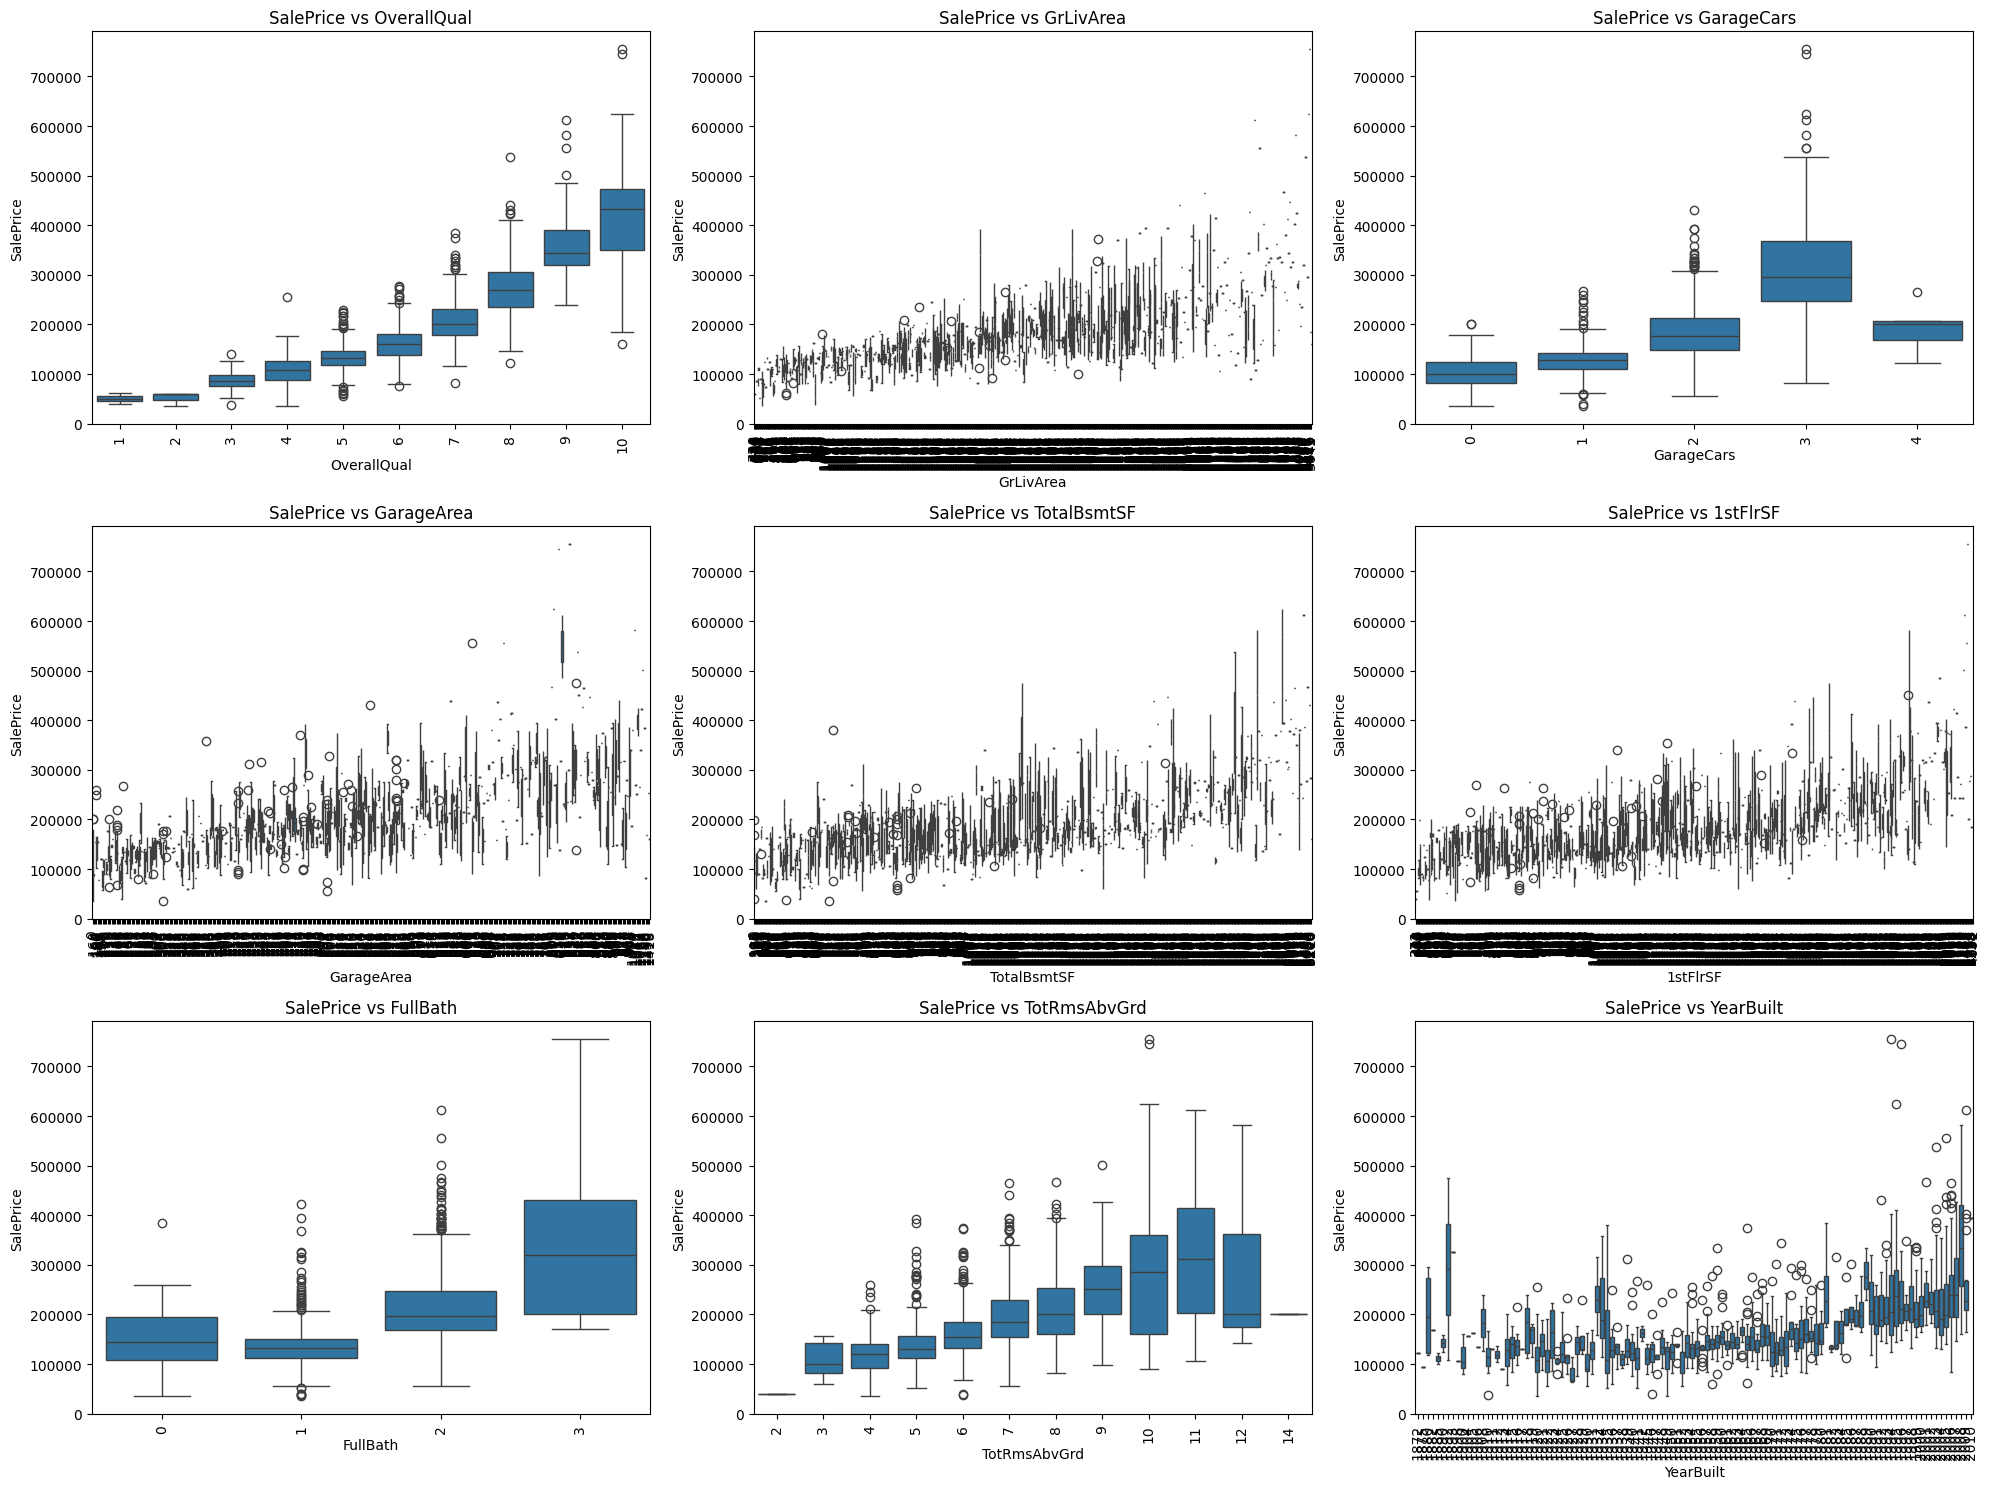

In [18]:
# sns.boxplot(x='OverallQual', y='SalePrice', data=train)
# plt.xticks(rotation=90)
# plt.figure()
# sns.boxplot(x='GrLivArea', y='SalePrice', data=train)
# plt.xticks(rotation=90)
# sns.boxplot(x='GarageCars', y='SalePrice', data=train)
# plt.xticks(rotation=90)
# sns.boxplot(x='GarageArea', y='SalePrice', data=train)
# plt.xticks(rotation=90)
# sns.boxplot(x='TotalBsmtSF', y='SalePrice', data=train)
# plt.xticks(rotation=90)
# sns.boxplot(x='1stFlrSF', y='SalePrice', data=train)
# plt.xticks(rotation=90)
# sns.boxplot(x='FullBath', y='SalePrice', data=train)
# plt.xticks(rotation=90)
# sns.boxplot(x='TotRmsAbvGrd', y='SalePrice', data=train)
# plt.xticks(rotation=90)
# sns.boxplot(x='YearBuilt', y='SalePrice', data=train)
# plt.xticks(rotation=90)

fig, axes = plt.subplots(3, 3, figsize=(20, 15))  # 3 rows x 3 columns
axes = axes.flatten()

features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
            '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']

for i, feature in enumerate(features):
    sns.boxplot(x=feature, y='SalePrice', data=train, ax=axes[i])
    axes[i].set_title(f'SalePrice vs {feature}')
    axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

In [25]:
from scipy.stats import skew
numeric_feats = train.select_dtypes(include=[np.number]).columns
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print(skewed_feats)

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.666326
OpenPorchSF       2.361912
LotFrontage       2.160866
SalePrice         1.880941
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
OverallCond       0.692355
TotRmsAbvGrd      0.675646
HalfBath          0.675203
Fireplaces        0.648898
BsmtFullBath      0.595454
OverallQual       0.216721
MoSold            0.211835
BedroomAbvGr      0.211572
GarageArea        0.179796
YrSold            0.096170
FullBath          0.036524
Id                0.000000
GarageCars       -0.342197
YearRemodAdd     -0.503044
YearBuilt        -0.612831
G

<Axes: >

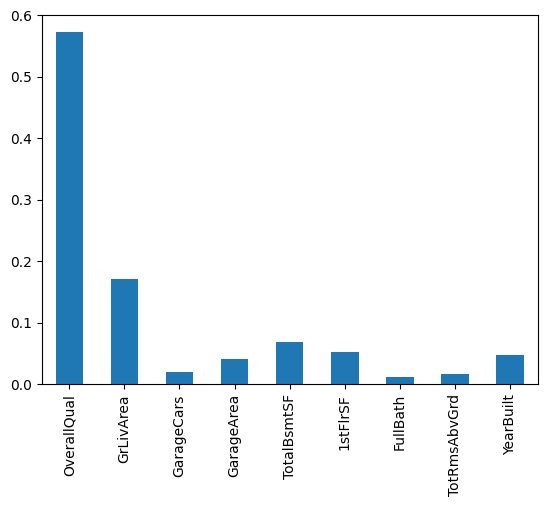

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

x = train[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
    'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']]
y =train['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
pd.Series(rf.feature_importances_, index=x_train.columns).head(10).plot(kind='bar')